In [1]:

import importlib
import graph_aligner
import graph_distancer

from graph_aligner import GraphAligner
from graph_distancer import GraphDistancer

importlib.reload(graph_aligner)
importlib.reload(graph_distancer)

import os
import shutil


def remove_pycache():
    for root, dirs, files in os.walk("."):
        if "__pycache__" in dirs:
            pycache_path = os.path.join(root, "__pycache__")
            print(f"Removing: {pycache_path}")
            shutil.rmtree(pycache_path)


remove_pycache()
print("__pycache__ directories removed.")

ModuleNotFoundError: No module named 'graph_aligner'

In [ ]:
# Example usage
graph1_path = "testcase/test/03_a.json"  # Path to your first graph JSON file
graph2_path = "testcase/test/03_b.json"  # Path to your second graph JSON file

aligner = GraphAligner(graph1_path, graph2_path)
matrix = aligner.compute_similarity_matrix()
matched_pair = aligner.match_pairs()
g1, g2 = aligner.align_graphs(shown_old_ids=False, save_to_file=True)

# Example usage
graph1_path = "graphA.json"  # Path to your first graph JSON file
graph2_path = "graphB.json"  # Path to your second graph JSON file

distancer = GraphDistancer(graph1_path, graph2_path)

i:\conda_envs\dspy_dfkg\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
gx1, gx2, g1, g2 = (
    distancer.graphx1,
    distancer.graphx2,
    distancer.graph1,
    distancer.graph2,
)

In [ ]:
g1

[{'id': '0', 'name': 'Node A', 'description': 'This is Node A'}]

In [ ]:
g2

[{'id': '0',
  'name': 'Node A',
  'description': 'This is Node A',
  'short': 'node a'}]

In [ ]:
# Print the adjacency list
distancer.print_gx(gx1)

Nodes: ['0']
Edges:


In [ ]:
distancer.print_gx(gx2)

Nodes: ['0']
Edges:


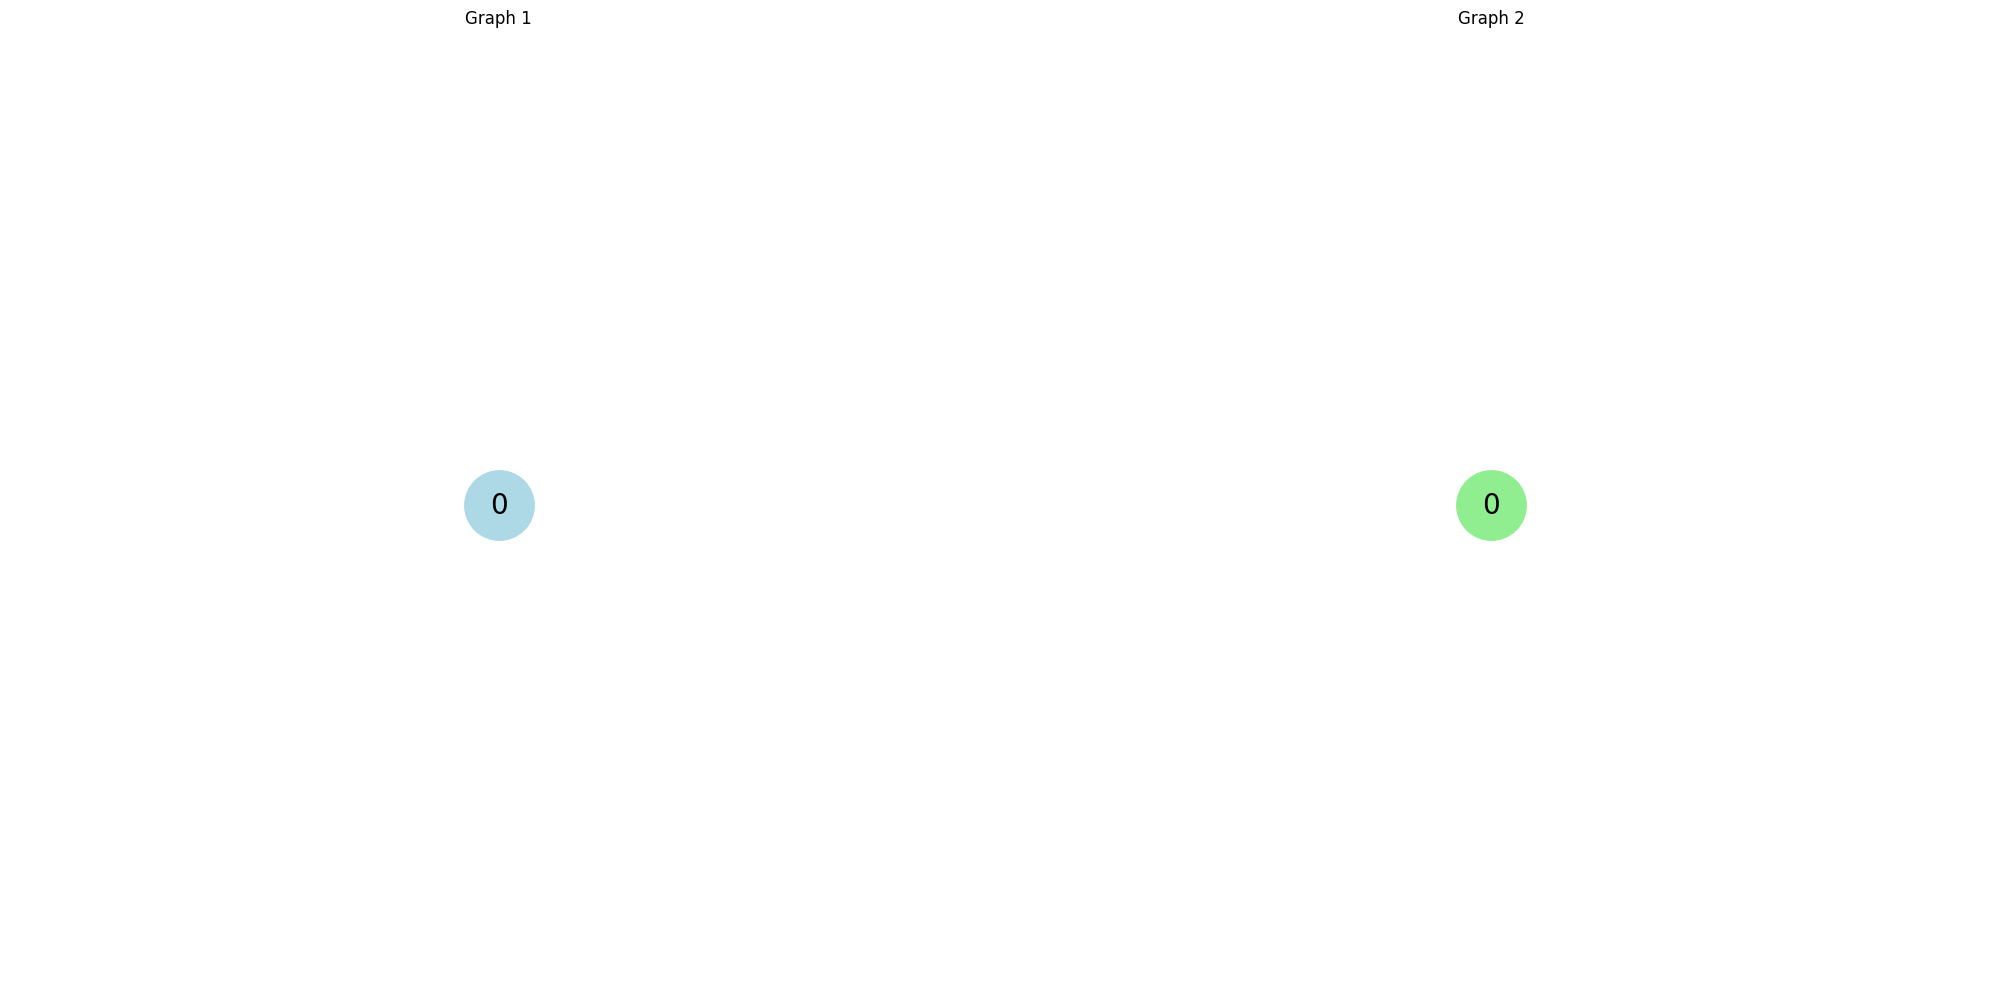

In [ ]:
distancer.visualize_graphs()

In [ ]:
distancer.calculate_graph_edit_distance()

Node substitution: {'id': '0'} -> {'id': '0'}, Cost: 0
Node deletion: {'id': '0'}, Cost: 1
Node insertion: {'id': '0'}, Cost: 1


0.0

In [ ]:
distancer.calculate_graph_key_distances()

({'short'},
 set(),
 {'description', 'id', 'name'},
 [{'id': '0', 'name': 'Node A', 'description': 'This is Node A'}],
 [{'id': '0',
   'name': 'Node A',
   'description': 'This is Node A',
   'short': 'node a'}])

In [ ]:
import networkx as nx


# Define our node and edge matching functions
def node_match(n1, n2):
    return n1["color"] == n2["color"]


def edge_match(e1, e2):
    return e1["weight"] == e2["weight"]


# Create our first graph
G1 = nx.Graph()
G1.add_node(1, color="red")
G1.add_node(2, color="blue")
G1.add_node(3, color="green")
G1.add_edge(1, 2, weight=1)
G1.add_edge(2, 3, weight=2)

# Create our second graph
G2 = nx.Graph()
G2.add_node(1, color="red")
G2.add_node(2, color="blue")
G2.add_node(3, color="yellow")
G2.add_node(4, color="green")
G2.add_edge(1, 2, weight=1)
G2.add_edge(2, 3, weight=1)
G2.add_edge(3, 4, weight=2)

# Calculate the Graph Edit Distance
ged = nx.graph_edit_distance(
    G1,
    G2,
    node_match=node_match,
    edge_match=edge_match,
    node_subst_cost=lambda n1, n2: 0 if node_match(n1, n2) else 1,
    node_del_cost=lambda n: 1,
    node_ins_cost=lambda n: 1,
    edge_subst_cost=lambda e1, e2: 0 if edge_match(e1, e2) else 1,
    edge_del_cost=lambda e: 1,
    edge_ins_cost=lambda e: 1,
)

print(f"The Graph Edit Distance is: {ged}")

The Graph Edit Distance is: 4.0


In [ ]:
import networkx as nx

# Create our graphs
G1 = nx.Graph()
G1.add_nodes_from([1, 2, 3])
G1.add_edges_from([(1, 2), (2, 3)])

G2 = nx.Graph()
G2.add_nodes_from([1, 2, 3, 4])
G2.add_edges_from([(1, 2), (2, 3), (3, 4)])


def node_match(n1, n2):
    return n1 == n2


def edge_match(e1, e2):
    return e1 == e2


# Custom cost functions to display all operations
def node_subst_cost(n1, n2):
    cost = 0 if node_match(n1, n2) else 1
    print(f"Node substitution: {n1} -> {n2}, Cost: {cost}")
    return cost


def node_del_cost(n):
    print(f"Node deletion: {n}, Cost: 1")
    return 1


def node_ins_cost(n):
    print(f"Node insertion: {n}, Cost: 1")
    return 1


def edge_subst_cost(e1, e2):
    cost = 0 if edge_match(e1, e2) else 1
    print(f"Edge substitution: {e1} -> {e2}, Cost: {cost}")
    return cost


def edge_del_cost(e):
    print(f"Edge deletion: {e}, Cost: 1")
    return 1


def edge_ins_cost(e):
    print(f"Edge insertion: {e}, Cost: 1")
    return 1


ged = nx.graph_edit_distance(
    G1,
    G2,
    node_match=node_match,
    edge_match=edge_match,
    node_subst_cost=node_subst_cost,
    node_del_cost=node_del_cost,
    node_ins_cost=node_ins_cost,
    edge_subst_cost=edge_subst_cost,
    edge_del_cost=edge_del_cost,
    edge_ins_cost=edge_ins_cost,
)

print(f"\nThe Graph Edit Distance is: {ged}")

Node substitution: {} -> {}, Cost: 0
Node substitution: {} -> {}, Cost: 0
Node substitution: {} -> {}, Cost: 0
Node substitution: {} -> {}, Cost: 0
Node substitution: {} -> {}, Cost: 0
Node substitution: {} -> {}, Cost: 0
Node substitution: {} -> {}, Cost: 0
Node substitution: {} -> {}, Cost: 0
Node substitution: {} -> {}, Cost: 0
Node substitution: {} -> {}, Cost: 0
Node substitution: {} -> {}, Cost: 0
Node substitution: {} -> {}, Cost: 0
Node deletion: {}, Cost: 1
Node deletion: {}, Cost: 1
Node deletion: {}, Cost: 1
Node insertion: {}, Cost: 1
Node insertion: {}, Cost: 1
Node insertion: {}, Cost: 1
Node insertion: {}, Cost: 1
Edge substitution: {} -> {}, Cost: 0
Edge substitution: {} -> {}, Cost: 0
Edge substitution: {} -> {}, Cost: 0
Edge substitution: {} -> {}, Cost: 0
Edge substitution: {} -> {}, Cost: 0
Edge substitution: {} -> {}, Cost: 0
Edge deletion: {}, Cost: 1
Edge deletion: {}, Cost: 1
Edge insertion: {}, Cost: 1
Edge insertion: {}, Cost: 1
Edge insertion: {}, Cost: 1

Th

In [ ]:
import networkx as nx

# Create two example undirected graphs with isolated nodes
G1 = nx.Graph()
G1.add_nodes_from([1, 2, 3, 4])
G1.add_edges_from([(1, 2), (2, 3)])
# Node 4 is isolated in G1

G2 = nx.Graph()
G2.add_nodes_from([1, 2, 3, 5])
G2.add_edges_from([(1, 2), (2, 3), (3, 5)])
# Node 1 becomes isolated in G2

# Calculate the edit paths and distance
edit_paths = list(nx.optimize_edit_paths(G1, G2))

# The first item in the list is the best edit path
best_path = edit_paths[0]
vertex_path, edge_path, cost = best_path

print(f"Graph Edit Distance: {cost}")
print("\nEdit Operations:")

# List vertex edit operations
for v1, v2 in vertex_path:
    if v1 is None:
        print(f"Insert node: {v2}")
    elif v2 is None:
        print(f"Delete node: {v1}")
    elif v1 != v2:
        print(f"Substitute node: {v1} -> {v2}")

# List edge edit operations
for e1, e2 in edge_path:
    if e1 is None:
        print(f"Insert edge: {e2}")
    elif e2 is None:
        print(f"Delete edge: {e1}")
    elif e1 != e2:
        print(f"Substitute edge: {e1} -> {e2}")

# Print isolated nodes for each graph
print("\nIsolated nodes:")
print(f"G1: {list(nx.isolates(G1))}")
print(f"G2: {list(nx.isolates(G2))}")

Graph Edit Distance: 1.0

Edit Operations:
Substitute node: 4 -> 5
Insert edge: (3, 5)

Isolated nodes:
G1: [4]
G2: []


In [ ]:
import networkx as nx


def calculate_graph_edit_distance(G1, G2):
    """
    Calculate the graph edit distance between two undirected graphs and list each edit operation.

    Parameters:
    G1, G2 (networkx.Graph): The two graphs to compare

    Returns:
    float: The graph edit distance
    list: List of edit operations
    """
    # Calculate the edit paths and distance
    edit_paths = list(nx.optimize_edit_paths(G1, G2))

    # The first item in the list is the best edit path
    best_path = edit_paths[0]
    vertex_path, edge_path, cost = best_path

    edit_operations = []

    # List vertex edit operations
    for v1, v2 in vertex_path:
        if v1 is None:
            edit_operations.append(f"Insert node: {v2}")
        elif v2 is None:
            edit_operations.append(f"Delete node: {v1}")
        elif v1 != v2:
            edit_operations.append(f"Substitute node: {v1} -> {v2}")

    # List edge edit operations
    for e1, e2 in edge_path:
        if e1 is None:
            edit_operations.append(f"Insert edge: {e2}")
        elif e2 is None:
            edit_operations.append(f"Delete edge: {e1}")
        elif e1 != e2:
            edit_operations.append(f"Substitute edge: {e1} -> {e2}")

    return cost, edit_operations


# Example usage
if __name__ == "__main__":
    # Create two example undirected graphs with isolated nodes
    G1 = nx.Graph()
    G1.add_nodes_from([1, 2, 3, 4])
    G1.add_edges_from([(1, 2), (2, 3)])
    # Node 4 is isolated in G1

    G2 = nx.Graph()
    G2.add_nodes_from([1, 2, 3, 5])
    G2.add_edges_from([(1, 2), (2, 3), (3, 5)])
    # Node 1 becomes isolated in G2

    # Calculate graph edit distance and get edit operations
    distance, operations = calculate_graph_edit_distance(G1, G2)

    # Print results
    print(f"Graph Edit Distance: {distance}")
    print("\nEdit Operations:")
    for op in operations:
        print(op)

    # Print isolated nodes for each graph
    print("\nIsolated nodes:")
    print(f"G1: {list(nx.isolates(G1))}")
    print(f"G2: {list(nx.isolates(G2))}")

Graph Edit Distance: 1.0

Edit Operations:
Substitute node: 4 -> 5
Insert edge: (3, 5)

Isolated nodes:
G1: [4]
G2: []


In [ ]:
from collections import defaultdict
import networkx as nx


def calculate_graph_edit_distance_details(G1, G2):
    """
    Calculate the graph edit distance between two undirected graphs and provide detailed edit operations.

    Parameters:
    G1, G2 (networkx.Graph): The two graphs to compare

    Returns:
    float: The graph edit distance
    dict: Dictionary of edit operations grouped by type
    dict: Dictionary of number of edit operations for each type
    """
    # Calculate the edit paths and distance
    edit_paths = list(nx.optimize_edit_paths(G1, G2))

    # The first item in the list is the best edit path
    best_path = edit_paths[0]
    vertex_path, edge_path, cost = best_path

    edit_operations = defaultdict(list)
    num_edit_operations = defaultdict(int)

    # List vertex edit operations
    for v1, v2 in vertex_path:
        if v1 is None:
            edit_operations["insert_node"].append(v2)
            num_edit_operations["insert_node"] += 1
        elif v2 is None:
            edit_operations["delete_node"].append(v1)
            num_edit_operations["delete_node"] += 1
        elif v1 != v2:
            edit_operations["substitute_node"].append((v1, v2))
            num_edit_operations["substitute_node"] += 1

    # List edge edit operations
    for e1, e2 in edge_path:
        if e1 is None:
            edit_operations["insert_edge"].append(e2)
            num_edit_operations["insert_edge"] += 1
        elif e2 is None:
            edit_operations["delete_edge"].append(e1)
            num_edit_operations["delete_edge"] += 1
        elif e1 != e2:
            edit_operations["substitute_edge"].append((e1, e2))
            num_edit_operations["substitute_edge"] += 1

    return cost, dict(edit_operations), dict(num_edit_operations)


# Example usage
if __name__ == "__main__":
    # Create two example undirected graphs
    G1 = nx.Graph()
    G1.add_nodes_from([1, 2, 3, 4])
    G1.add_edges_from([(1, 2), (2, 3)])

    G2 = nx.Graph()
    G2.add_nodes_from([1, 2, 3, 5])
    G2.add_edges_from([(1, 2), (2, 3), (3, 5)])

    # Calculate graph edit distance and get edit operations
    distance, operations, num_operations = calculate_graph_edit_distance_details(G1, G2)

    # Print results
    print(f"Graph Edit Distance: {distance}")
    print("\nEdit Operations:")
    for op_type, op_list in operations.items():
        print(f"{op_type.replace('_', ' ').title()}:")
        for op in op_list:
            print(f"  {op}")

    print("\nNumber of Edit Operations:")
    for op_type, count in num_operations.items():
        print(f"{op_type.replace('_', ' ').title()}: {count}")

Graph Edit Distance: 1.0

Edit Operations:
Substitute Node:
  (4, 5)
Insert Edge:
  (3, 5)

Number of Edit Operations:
Substitute Node: 1
Insert Edge: 1
